> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape


(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [6]:
df.duplicated().any()

False


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [8]:
#shifting all column names into lower case letters
df.rename(columns=lambda r: r.lower(),inplace=True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [9]:
#fixing some typos
df.rename(columns={'hipertension':'hypertension'},inplace=True)
df.rename(columns={'handcap':'handicap'},inplace=True)

In [10]:
#fixing the last column
df.rename(columns={'no-show':'showed'},inplace=True)

In [11]:
#fixing the last column
df['showed']=df['showed'].apply(lambda n: n.replace('No','0'))
df['showed']=df['showed'].apply(lambda y: y.replace('Yes','1'))


In [12]:
#fixing data types
df['showed']=df['showed'].astype(int)


In [13]:
df['showed'].unique()

array([0, 1])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
showed            110527 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


In [15]:
#fixing the types of dates columns
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
showed            110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(2)
memory usage: 11.8+ MB


In [17]:
df.tail()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,0


In [18]:
df.describe()


,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


there's an age cell with the value of (-1) so it needs to be fixed before starting the analysis process


there're some wrong values in the handicap column so it needs to be fixed as well

In [19]:
df.query('age==-1')
df.drop(index=99832,inplace=True)

In [20]:
wrong=df.query('handicap > 1').index
df.drop(index=wrong,inplace=True)

In [21]:
df['handicap'].nunique()

2

In [22]:
df.duplicated().any()

False

In [23]:
df['patientid'].duplicated().sum()

48137

In [24]:
#dropping columns that won't be used in the analysis
df.drop(['appointmentid','patientid'],axis=1,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### is gender,neighbourhood related to showing up status

# A quick review on the entire data

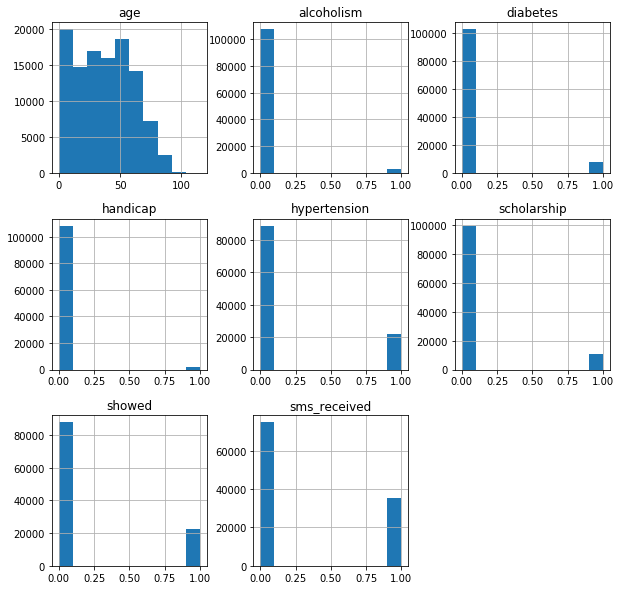

In [25]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(10,10));

# an overall look on who showed vs who didn't

Text(0.5,1,'who showed up')

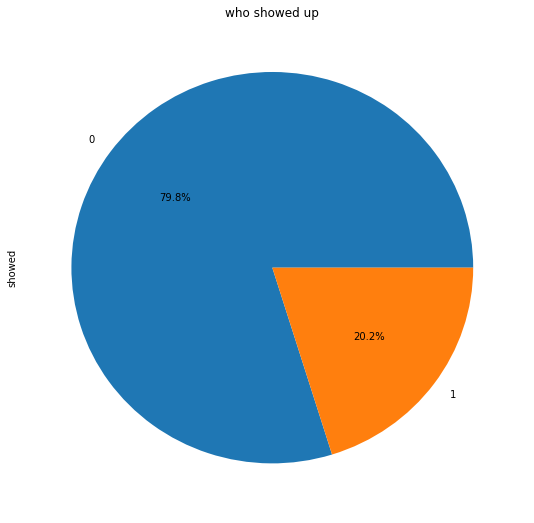

In [26]:
df['showed'].value_counts().plot(kind='pie',figsize=(9,9),autopct='%1.1f%%');
plt.title('who showed up')

looks like people who showed are almost near three times less than people who didn't

# which gender is more to attend their appointment

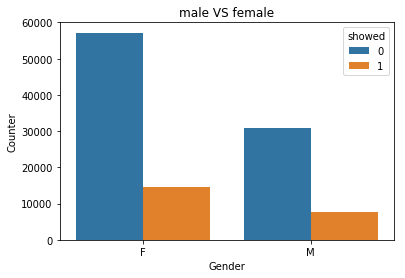

In [27]:
sb.countplot(data=df,x='gender',hue='showed')
plt.title('male VS female');
plt.xlabel('Gender')
plt.ylabel('Counter');

the chart above shows that women are more committed to thier appointments than men

# Exploring which neighbourhood is more likely to attend thier appointments

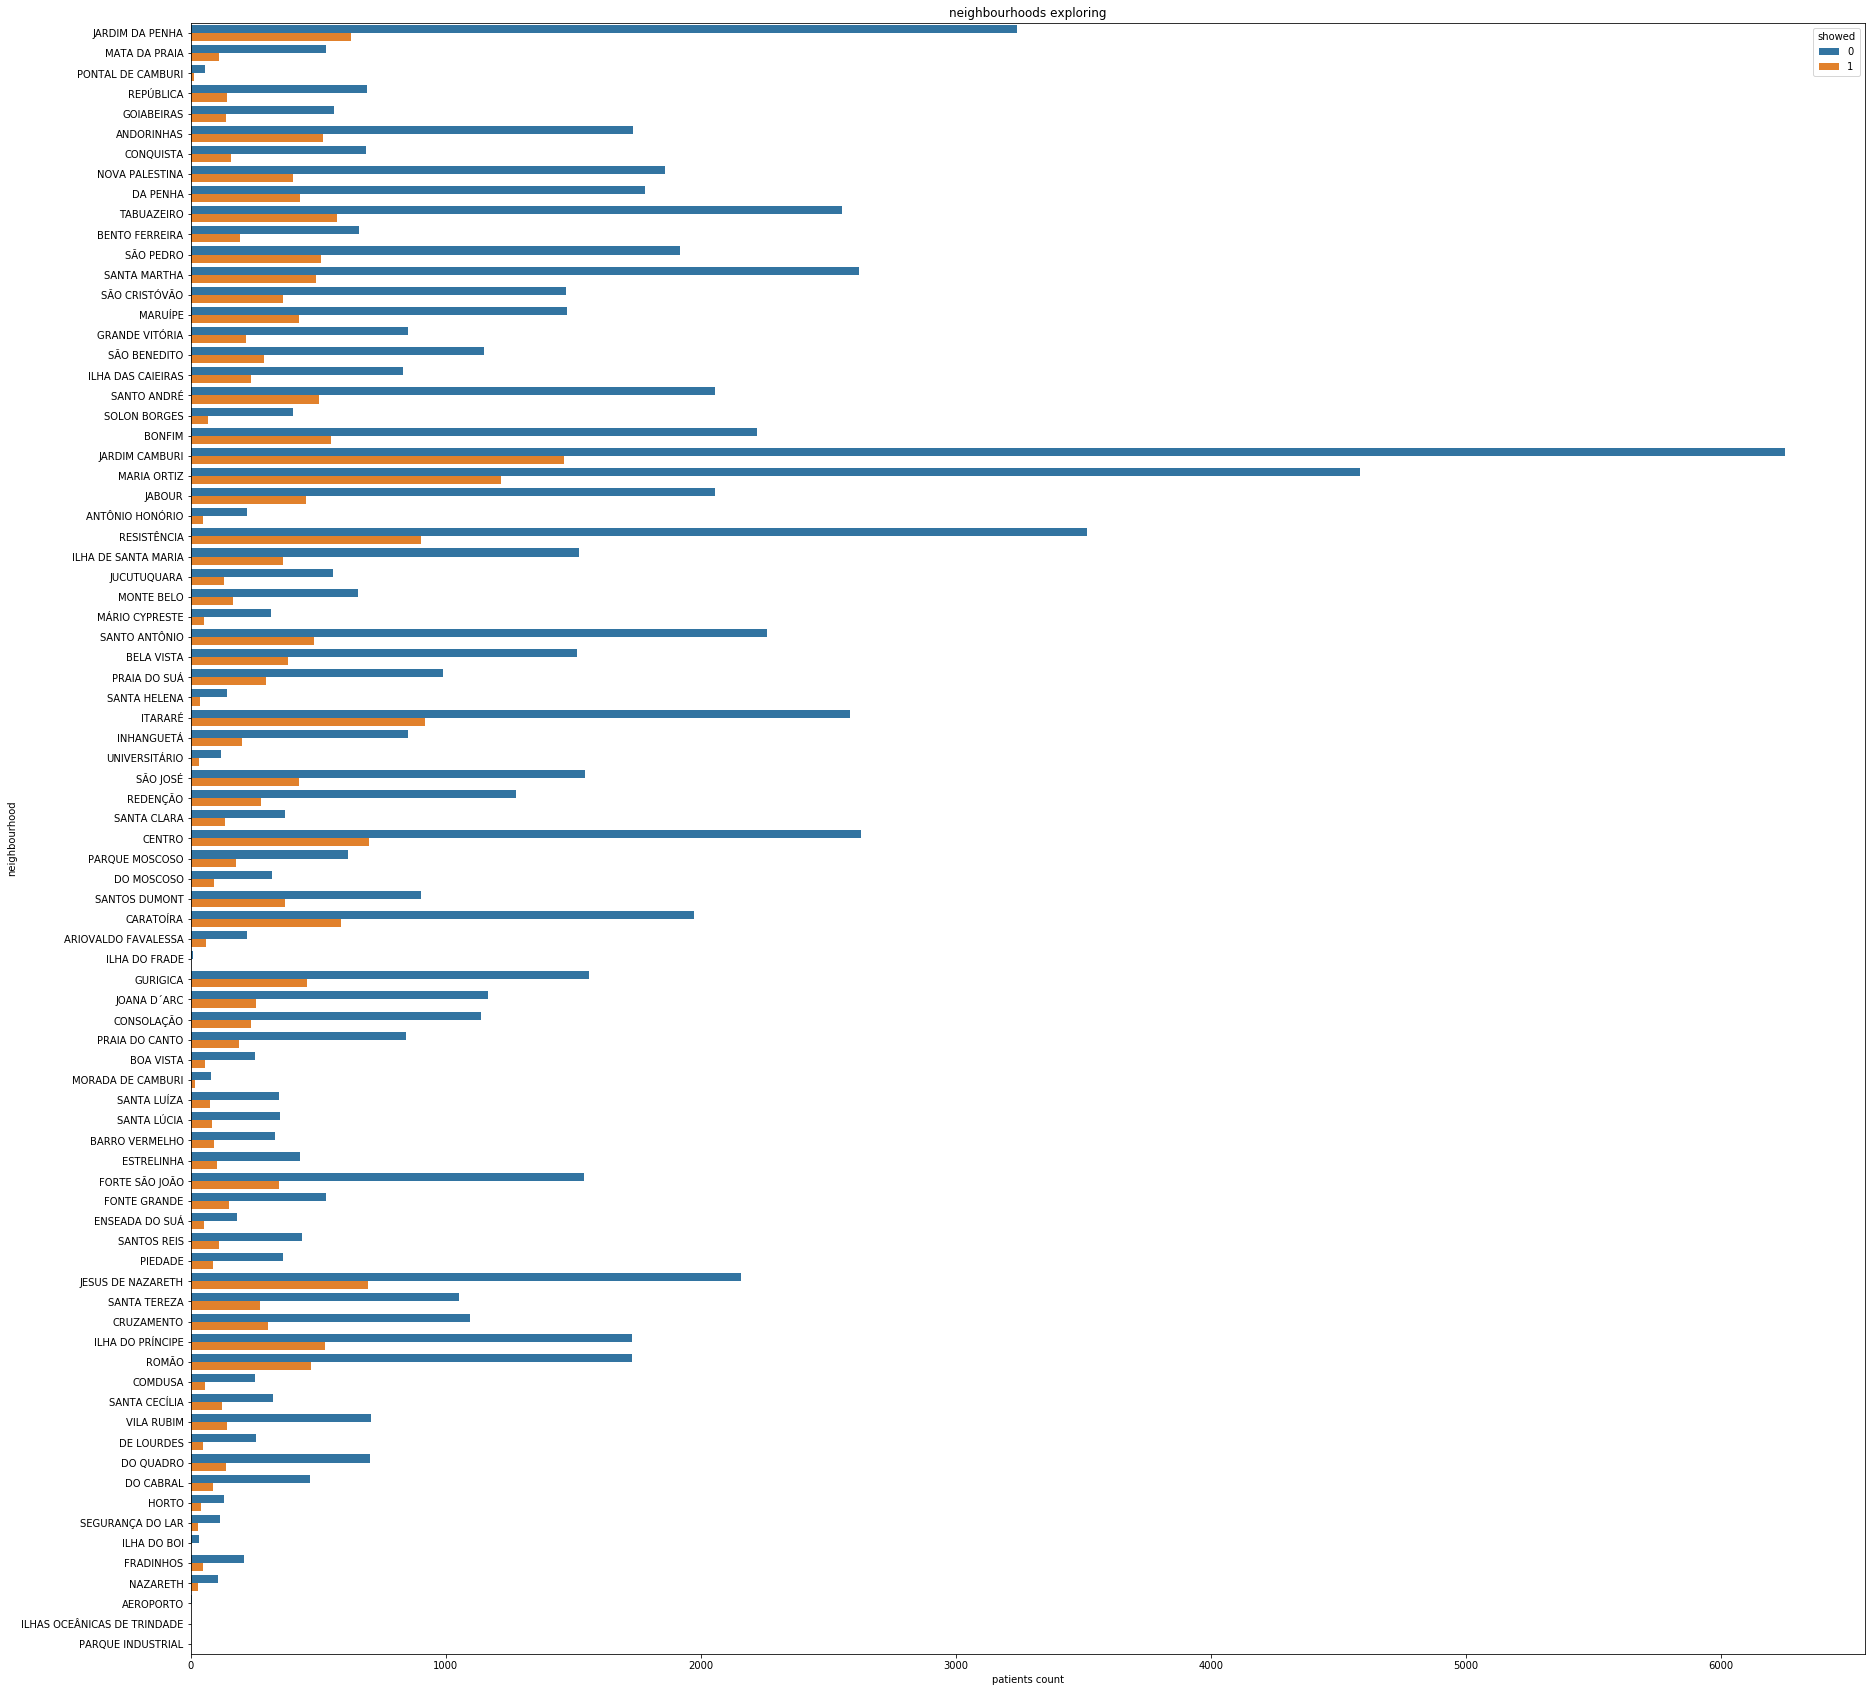

In [28]:
plt.figure(figsize=(30,30))
sb.countplot(data=df,y='neighbourhood',hue='showed')
plt.title('neighbourhoods exploring')
plt.xlabel('patients count')
plt.ylabel('neighbourhood');

the neighbourhood thats called 'JARDIM DA PENHA' has the most patient that made it to thier appointments.

# relation between disability and showing up status

In [29]:
disable_per=(df.query('handicap==1&showed==1').showed.count() / df.query('handicap==1').showed.count())*100
#percent of people who have shown with disability

In [30]:
nondisable_per=(df.query('handicap==0&showed==1').showed.count() / df.query('handicap==0').showed.count())*100
#percent of people who have shown without disability

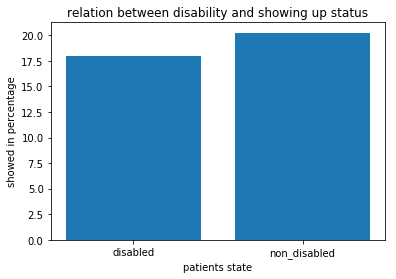

In [32]:
def bar_plot(arg1 , arg2 , arg3 , arg4 , arg5):
    plt.bar([arg1,arg2],[arg3,arg4])
    plt.title(arg5)
    plt.ylabel('showed in percentage')
    plt.xlabel('patients state')
bar_plot('disabled','non_disabled',disable_per,nondisable_per,'relation between disability and showing up status')

the chart doesn't show something clear but it seems like people without disability have slighltly more ability to show up 

# Relation between chronic diseases and showing up status

In [33]:
chron_per=(df.query('hypertension == 1 & diabetes == 1 & showed == 1').showed.count() / df.query('hypertension == 1 & diabetes == 1').showed.count())*100

In [34]:
nonchron_per=(df.query('hypertension == 0 & diabetes == 0 & showed == 1').showed.count() / df.query('hypertension == 0 & diabetes == 0 ').showed.count())*100

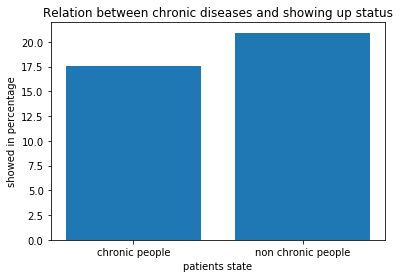

In [35]:
bar_plot('chronic people','non chronic people',chron_per,nonchron_per,'Relation between chronic diseases and showing up status')

the chart doesn't show something clear but it seems like people without chronic diseases have slighltly more ability to show up 

# Conclusions

people who showed up are three times less than people who didn't

from the patient id columns that we dropped in the cleaning phase ,it looks like there are alot of duplicates and there could be more than possible senario:

_it could be the same patient with a different appointments 
_it could be a typo

women are more tight when it comes to appointments than men 

different diseases don't seem like affecting the showing up status of the patient

neighbourhood does not show to be of an effective varibale, as most of the areas has nearby percentages of showing up to appointments, a lot of factors can play into that, such as transport system, distrubtion of medical centers, we can not study those due to data limitations, so in conclusion neighbourhood alone can not be conclusive




# Limitations

the alcoholism column says that patient who are 14 do have alcoholism which doesn't make sense at all

the scholarship system that was provided through the documentation doesn't work as a valid trusted indicator for awarness

i recommend that the data should've containted marital and employment status



In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0